In [1]:
from __future__ import division
import pandas as pd
import numpy as np 
import matplotlib.pylab as plt
from code.organize import *
from code.roughEDA import *
from code.survey_processor_full import *
from code.model_vis import *

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import roc_auc_score, confusion_matrix,roc_curve
from sklearn.grid_search import GridSearchCV
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
sv = survey('data/survey2/')

In [3]:
sv.num_processor()

In [4]:
df = sv.fin_data

### split

In [33]:
dfc = df.copy()

y = dfc.pop('employed').values
X = dfc.values

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)

## Random Forest

In [35]:
rf = RandomForestClassifier(n_jobs=-1)

In [36]:
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

[[272 234]
 [209 760]]


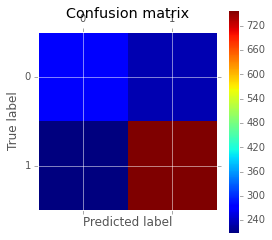

In [37]:
plot_confusion_matrix(rf,X_test,y_test)

roc_auc_score : 0.727741814429


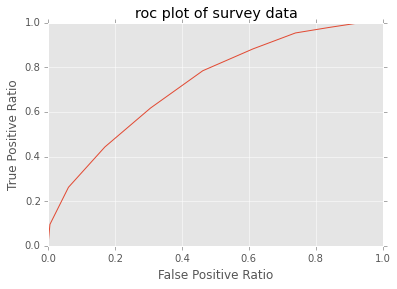

In [38]:
plot_roc(rf,X_test,y_test)


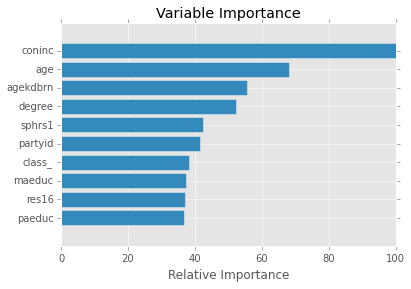

In [39]:
plot_importance(rf,dfc)

In [72]:
dfc.shape

(4469, 145)

## shrink the size

In [79]:
f = rf.feature_importances_.argsort()


In [78]:
for i in f:
    

,coninc,age,agekdbrn,degree,sphrs1,partyid,class_,maeduc,res16,paeduc,...,"age_Dk,na",age_As many as want,sphrs1_Don't know,age_No answer,age_Don't know,age_Not applicable,sphrs1_Seven+,sphrs1_As many as want,"sphrs1_Dk,na",chldidel_As many as want
0,16137.00000,21,98,1,98,0,1,12,6,12,...,False,False,False,False,False,False,False,False,False,False
3,121553.00000,30,27,3,50,1,4,13,6,12,...,False,False,False,False,False,False,False,False,False,False
4,121553.00000,41,38,3,80,2,4,17,6,12,...,False,False,False,False,False,False,False,False,False,False
5,64546.00000,25,20,4,98,5,4,17,6,12,...,False,False,False,False,False,False,False,False,False,False
6,0.00000,29,18,1,98,3,3,1,3,1,...,False,False,False,False,False,False,False,False,False,False
8,121553.00000,34,98,2,65,5,3,12,3,13,...,False,False,False,False,False,False,False,False,False,False
10,79216.00000,33,98,4,40,5,3,5,6,12,...,False,False,False,False,False,False,False,False,False,False
11,0.00000,38,98,3,98,1,2,12,3,12,...,False,False,False,False,False,False,False,False,False,False
13,7628.00000,26,19,0,98,3,3,2,3,12,...,False,False,False,False,False,False,False,False,False,False
14,6455.00000,36,98,1,98,0,3,12,6,12,...,False,False,False,False,False,False,False,False,False,False


In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)

In [69]:
rfs = RandomForestClassifier()
rfs.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

[[309 197]
 [233 736]]


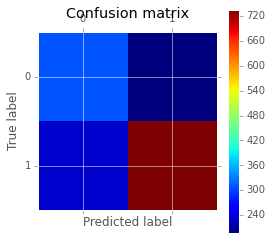

In [70]:
plot_confusion_matrix(rfs,X_test,y_test)

roc_auc_score : 0.741556431185


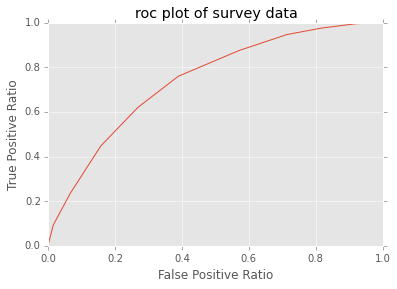

In [71]:
plot_roc(rfs,X_test,y_test)

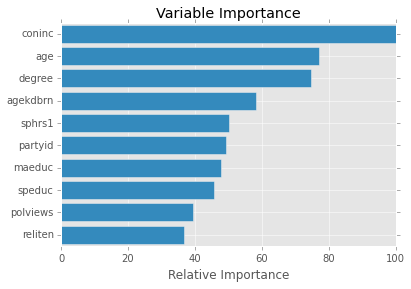

In [52]:
plot_importance(rfs,df_s)

In [59]:
df_s.columns

Index([u'coninc', u'age', u'agekdbrn', u'degree', u'sphrs1', u'partyid',
       u'class_', u'maeduc', u'res16', u'paeduc', u'incom16', u'speduc',
       u'reliten', u'polviews', u'socfrend', u'finrela', u'dwelling',
       u'natroad', u'divorce', u'fund', u'marital', u'mobile16', u'satfin',
       u'pillok', u'natsoc', u'natfare', u'fechld', u'mawrkgrw', u'socbar',
       u'fefam', u'dwelown', u'natpark', u'natarms', u'natspac', u'meovrwrk',
       u'fepresch', u'chldidel', u'natcity', u'helpnot', u'racdif4',
       u'natdrug', u'kidssol', u'postlife', u'conbus', u'cappun', u'obey',
       u'wrkwayup', u'workhard', u'coop', u'discaff', u'parsol', u'parborn',
       u'happy', u'hapmar', u'conclerg', u'helpoth', u'helpsick', u'letdie1',
       u'consci', u'trust', u'coneduc', u'uswary', u'nateduc', u'thnkself',
       u'natcrime', u'conjudge', u'natrace', u'contv', u'spkcom', u'abnomore',
       u'helppoor', u'courts', u'spkmil', u'spanking', u'homosex', u'goodlife',
       u'conlegis', 